Insurance Predication

1. Importing Libraries
The notebook starts by importing necessary Python libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn for data manipulation, visualization, and machine learning.

2. Loading the Dataset
The dataset insurance.csv is loaded using pandas. The dataset contains information about individuals, including their age, sex, BMI, number of children, smoking status, region, and insurance charges.

3. Data Exploration
The first few rows of the dataset are displayed using df.head(5).

Basic information about the dataset, such as data types and non-null counts, is obtained using df.info().

Descriptive statistics for numerical columns are generated using df.describe().

The notebook checks for null values in the dataset using df.isnull().sum().

4. Data Preprocessing
The notebook replaces categorical values with numerical ones for easier processing:

sex: "male" is replaced with 1, and "female" is replaced with 0.

region: Different regions are replaced with numerical codes.

smoker: "yes" is replaced with 1, and "no" is replaced with 0.

5. Data Visualization
A count plot is created to visualize the distribution of smokers and non-smokers in the dataset.

A bar plot is used to show the relationship between smoking status and sex.

A distribution plot (histogram) is created to visualize the distribution of ages in the dataset.

6. Summary
The notebook focuses on exploring and preprocessing the insurance dataset, with an emphasis on understanding the distribution of key variables and preparing the data for machine learning models. The visualizations help in gaining insights into the dataset, such as the distribution of ages and the relationship between smoking status and sex.

This notebook serves as a preliminary step in a machine learning pipeline, where the data is cleaned, explored, and preprocessed before being fed into a machine learning model for predicting insurance costs.

#import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv("insurance.csv")
#import dataset

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# data statistics
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# check the dataset  null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# value count for region
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [8]:
# value count for smoker
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

 Replace Value for DataSet

In [32]:
df["sex"].replace("male",1,inplace= True)# male->1
df["sex"].replace("female",0,inplace= True)#female-> 0

In [31]:
#southwest=>1,southeast->0,northewest->2,northeast->3
df["region"].replace("southwest",1,inplace= True)
df["region"].replace("southeast",0,inplace= True)
df["region"].replace("northwest",2,inplace= True)
df["region"].replace("northeast",3,inplace= True)

In [30]:
df["smoker"].replace("yes",1,inplace= True) #yes =1
df["smoker"].replace("no",0,inplace= True)#no=0

# Data Visulaization

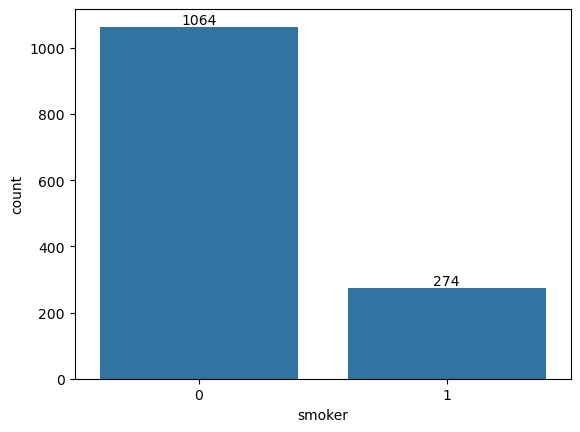

In [12]:
sm=sns.countplot(x="smoker",data=df)
for bars in sm.containers:
    sm.bar_label(bars)
    
plt.show()

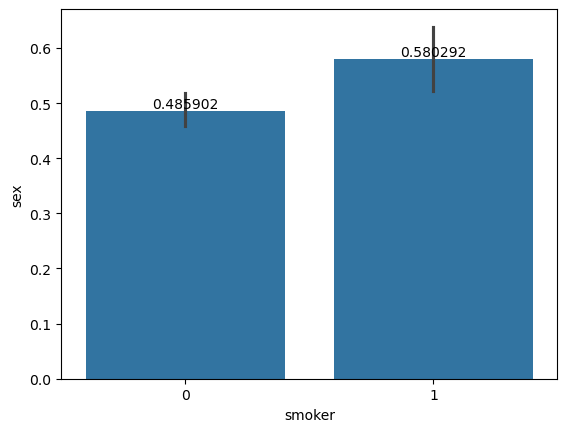

In [13]:
ss=sns.barplot(x="smoker",y="sex",data=df)
for bars in ss.containers:
    ss.bar_label(bars)
plt.show()
    


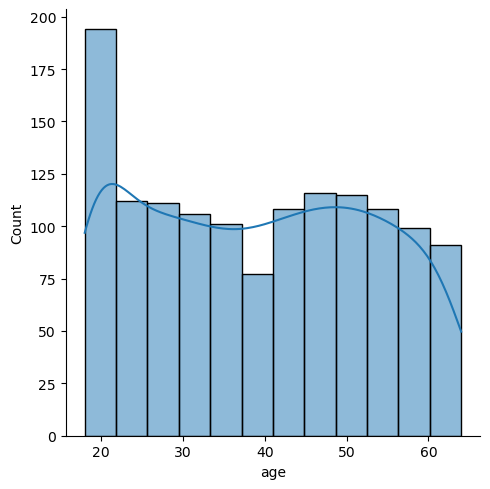

In [14]:
sns.displot(x="age",data=df,kde=True)
plt.show()

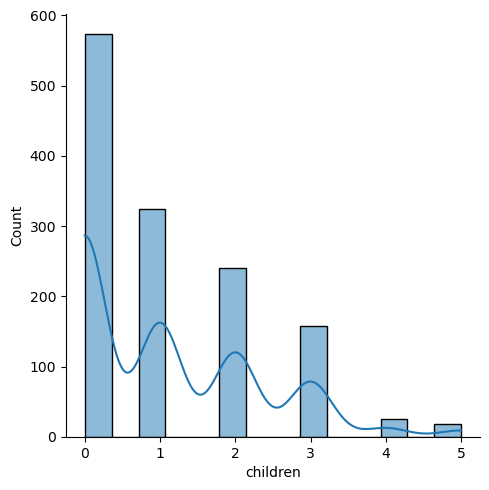

In [15]:
sns.displot(x="children",data=df,kde=True)
plt.show()

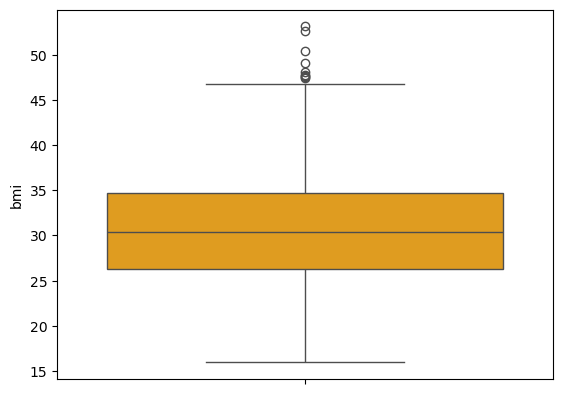

In [16]:
sns.boxplot(y="bmi",data=df,color="orange")
plt.show()

# Data Traning Test Splites

In [17]:
x=df.drop(columns="charges")
y=df["charges"]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Linear Regression model

In [19]:
lr=LinearRegression()

In [20]:
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
lr.score(x_test,y_test)*100

78.39279776463968

In [22]:
lr.score(x_train,y_train)*100

74.15700001111735

In [23]:
pred_train=lr.predict(x_train)

In [24]:
r2_train=metrics.r2_score(y_train,pred_train)
print(r2_train)

0.7415700001111735


In [25]:
pred_test=lr.predict(x_test)

In [26]:
r2_test=metrics.r2_score(y_test,pred_test)
print(r2_test)

0.7839279776463968


# Buliding For Prediction

In [29]:
input_data=(31,1,26.74,1,1,0)
input_data_array=np.asarray(input_data)
reshaped=input_data_array.reshape(1,-1)
prediction=lr.predict(reshaped)



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
print(f"The Insurance Cost is ₹{prediction}")

The Insurance Cost is ₹[28299.0319372]
